___
# Ciência dos Dados - PROJETO 1

## Anna Beathriz Cipriano de Mauro
___

## Celular x Microcomputador

___
## Introdução


<p style = "text-indent:4em">Em 2016, em uma pesquisa divulgada pela UIT (União Internacional de Telecomunicações), dados mostraram que, naquele ano, o número de pessoas que permanecem sem acesso à internet no mundo é de 3,7 milhões. Além disso, notou-se que a penetração da internet era de 81% nos países desenvolvidos, de 40% nos emergentes e de 15% nos países mais pobres. A partir dessas informações, percebe-se que há uma certa relação entre a riqueza da região e o acesso à internet, sendo diretamente proporcionais.</p>
<p style = "text-indent:4em">Na pesquisa da UIT também foi divulgado que 95% da população global estava vivendo em áreas cobertas ao menos pela tecnologia 2G e que, em países em desenvolvimento, o número de assinaturas de Internet móvel vem aumentando de maneira considerável.</p>
<p style = "text-indent:4em">Tentando encontrar uma possível causa para esse crescimento, percebeu-se que, sendo o celular um dispositivo móvel, grande parte das pessoas que o possuem devem utilizar a internet móvel. Por isso, uma notícia divulgada pelo G1(<em>"Celular se consolida como principal meio de acesso à internet no Brasil, aponta IBGE"</em>) recebe destaque. Nela há o relato sobre o crescimento do uso do celular para acessar à internet no Brasil, chegando até a ultrapassar o microcomputador, fato surpreendente já que o smartphone ainda é uma tecnologia nova.</p>
<p style = "text-indent:4em">Desse modo, para este projeto, decidiu-se analisar como se dá, se houver, o acesso à internet no Brasil por pessoas de classes mais baixas (com renda de até 3 salários mínimos) e que moram em área urbana nos anos de 2013, 2014 e 2015. O intuito dessa análise é comparar o comportamento brasileiro em relação ao acesso à Internet via celular com o feito através do microcomputador.</p>


<p><b>Fontes:</b></p>
<em>G1</em>: http://g1.globo.com/economia/noticia/cai-pela-1-vez-no-brasil-o-acesso-a-internet-por-meio-de-computador-diz-ibge.ghtml

<em>UIT</em>: https://nacoesunidas.org/uit-37-bilhoes-de-pessoas-ainda-nao-tem-acesso-a-internet-no-mundo/

___
## Análise e Resultados

<b>Etapas iniciais de programação para ser possível a análise:</b>

<b>1)</b> Importando as bibliotecas necessárias:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as mpatches

<b>2)</b> Lendo os arquivos e agrupando-os em uma mesma variável chamada dados:

In [2]:
dados15 = pd.read_csv('DOM2015.csv',sep=',')
dados14 = pd.read_csv('DOM2014.csv',sep=',')
dados13 = pd.read_csv('DOM2013.csv',sep=',')
dados1 = dados15.append(dados14)
dados = dados1.append(dados13)

<b>3)</b> Filtrando os dados:

In [3]:
#Apenas área urbana
dados = dados[dados.V4105 <= 3]

#Ano
dados=dados.rename(columns = {'V0101':'Ano'}) 

#Renda
dados=dados.rename(columns = {'V4621':'Renda'})
dados.loc[dados.Renda == 999999999999.0 , 'Renda'] = np.NaN

#Região
dados.loc[dados.UF<20,'REGIAO'] = 'Norte'
dados.loc[dados.UF>=20,'REGIAO'] = 'Nordeste'
dados.loc[dados.UF>=30,'REGIAO'] = 'Sudeste'
dados.loc[dados.UF>=40,'REGIAO'] = 'Sul'
dados.loc[dados.UF>=50,'REGIAO'] = 'Centro-Oeste'

#-------------------- Internet -------------------------------

#Modo de acesso
dados.loc[dados.V02323 == 2, 'Microcomputador'] = 'Sim'
dados.loc[dados.V02323 == 4, 'Microcomputador'] = 'Não'

dados.loc[dados.V02324 == 2, 'Celular'] = 'Sim'
dados.loc[dados.V02324 == 4, 'Celular'] = 'Não'


dados.loc[:,'Modo de acesso'] = dados.Microcomputador+ dados.Celular
dados.loc[dados['Modo de acesso'] == 'SimSim', 'Modo de acesso'] = 'Ambos'
dados.loc[dados['Modo de acesso'] == 'SimNão', 'Modo de acesso'] = 'Microcomputador'
dados.loc[dados['Modo de acesso'] == 'NãoSim', 'Modo de acesso'] = 'Celular'
dados.loc[dados['Modo de acesso'] == 'NãoNão', 'Modo de acesso'] = 'Nenhum deles'


#Faixa salarial
salariomin2013 = 678
salariomin2014 = 724
salariomin2015 = 788

dados.loc[(dados.Renda<=salariomin2013/2) & (dados.Ano==2013), 'Faixa salarial'] = 'Até 1/2 salário mínimo'
dados.loc[(dados.Renda>salariomin2013/2) & (dados.Ano==2013), 'Faixa salarial'] = '1/2 até 1 salário mínimo'  
dados.loc[(dados.Renda>salariomin2013) & (dados.Ano==2013), 'Faixa salarial'] = '1 a 2 salários mínimos'
dados.loc[(dados.Renda>salariomin2013*2) & (dados.Ano==2013), 'Faixa salarial'] = '2 a 3 salários mínimos'
dados.loc[(dados.Renda>salariomin2013*3) & (dados.Ano==2013), 'Faixa salarial'] = '3 a 4 salários mínimos'
dados.loc[(dados.Renda>salariomin2013*4) & (dados.Ano==2013), 'Faixa salarial'] = '4 a 5 salários mínimos'
dados.loc[(dados.Renda>salariomin2013*5) & (dados.Ano==2013), 'Faixa salarial'] = 'Mais de 5 salários mínimos'

dados.loc[(dados.Renda<=salariomin2014/2) & (dados.Ano==2014), 'Faixa salarial'] = 'Até 1/2 salário mínimo'
dados.loc[(dados.Renda>salariomin2014/2) & (dados.Ano==2014), 'Faixa salarial'] = '1/2 até 1 salário mínimo'
dados.loc[(dados.Renda>salariomin2014) & (dados.Ano==2014), 'Faixa salarial'] = '1 a 2 salários mínimos'
dados.loc[(dados.Renda>salariomin2014*2) & (dados.Ano==2014), 'Faixa salarial'] = '2 a 3 salários mínimos'
dados.loc[(dados.Renda>salariomin2014*3) & (dados.Ano==2014), 'Faixa salarial'] = '3 a 4 salários mínimos'
dados.loc[(dados.Renda>salariomin2014*4) & (dados.Ano==2014), 'Faixa salarial'] = '4 a 5 salários mínimos'
dados.loc[(dados.Renda>salariomin2014*5) & (dados.Ano==2014), 'Faixa salarial'] = 'Mais de 5 salários mínimos'

dados.loc[(dados.Renda<=salariomin2015/2) & (dados.Ano==2015), 'Faixa salarial'] = 'Até 1/2 salário mínimo'
dados.loc[(dados.Renda>salariomin2015/2) & (dados.Ano==2015), 'Faixa salarial'] = '1/2 até 1 salário mínimo'
dados.loc[(dados.Renda>salariomin2015) & (dados.Ano==2015), 'Faixa salarial'] = '1 a 2 salários mínimos'
dados.loc[(dados.Renda>salariomin2015*2) & (dados.Ano==2015), 'Faixa salarial'] = '2 a 3 salários mínimos'
dados.loc[(dados.Renda>salariomin2015*3) & (dados.Ano==2015), 'Faixa salarial'] = '3 a 4 salários mínimos'
dados.loc[(dados.Renda>salariomin2015*4) & (dados.Ano==2015), 'Faixa salarial'] = '4 a 5 salários mínimos'
dados.loc[(dados.Renda>salariomin2015*5) & (dados.Ano==2015), 'Faixa salarial'] = 'Mais de 5 salários mínimos'




<b>4)</b> Criando DataFrame com apenas as variáveis que se desejam:

In [4]:
inicio = dados.columns.get_loc('REGIAO')
fim = dados.columns.get_loc('Modo de acesso')
ano = dados.columns.get_loc('Ano')
renda = dados.columns.get_loc('Renda')
faixa = dados.columns.get_loc('Faixa salarial')
Colunas =[ano,renda, faixa]
for x in range(inicio,fim+1):
    Colunas.append(x)
dados = dados.iloc[:,Colunas]

<b>5)</b> Retirando NaN das variáveis, porém tomando cuidado para não deletar dados importantes:

In [5]:
dados = dados.dropna()

<p style = "text-indent:4em">Para começar a analisar os dados é interessante analisar a renda das pessoas que acessam à internet via celular e via microcomputador, para tentar se traçar um perfil financeiro. Para isso, fez-se o <em><b>Gráfico 1</b></em> em que é possível analisar a distribuição da renda em geral.</p>

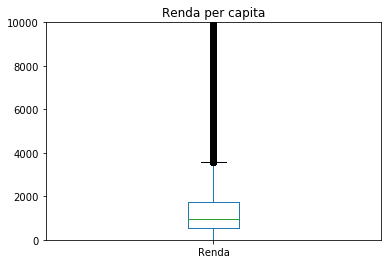

In [6]:
plot = dados.Renda.plot(kind='box', title= '2013')
plot.set_ylim([0, 10000])
plt.title('Renda per capita')
plt.show()


<em><b>Gráfico 1:</b> Boxplot da renda per capita</em>

<p style = "text-indent:4em"> A partir da análise do <em><b>Gráfico 1</b></em> é possível perceber que, da amostra, a moir parte dos domicílios tem renda per capita aproximadamente entre 500 e 2000 reais. Além disso, percebe-se que, para uma análise com a variável renda, como na hora de criar histogramas como os mostrados nos <em><b>Gráficos 2 a 7</b></em>, pode-se considerar um máximo de renda como aproximadamente 4000 reais sem causar problemas, já que acima desse valor, há apenas pontos aberrantes</p>

<p style = "text-indent:4em"> Os <em><b>Gráficos 2 a 7</b></em> a seguir mostram como é a dispersão da renda per capita entre os domicílios que acessam à internet pelo celular e os que acessam à internet pelo microcomputador com o passar dos anos</p>

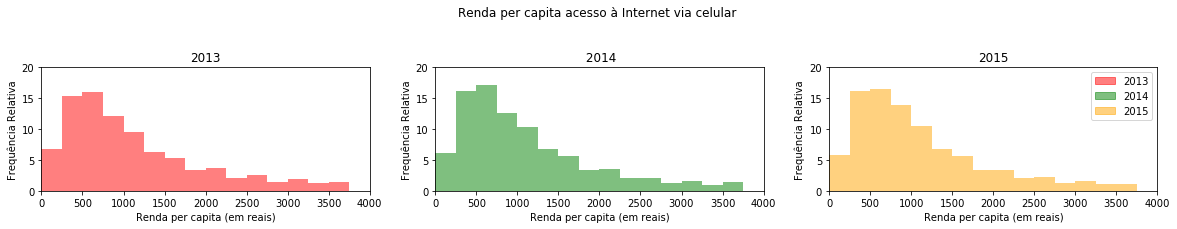

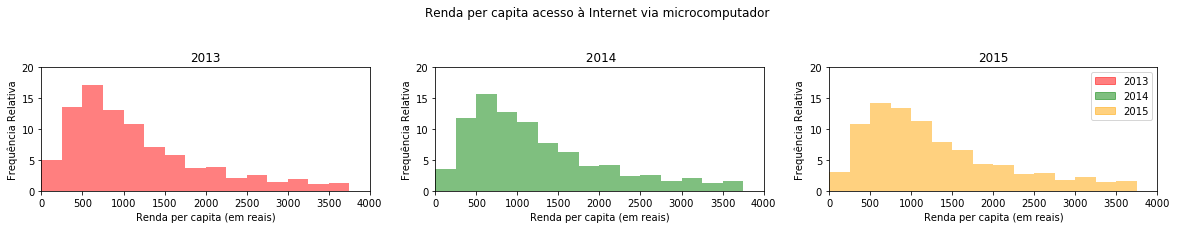

In [7]:
fig = plt.figure(figsize=(20, 5))
faixasrend = np.arange(0,4000,250)
dadosCel = dados[dados['Celular'] == 'Sim']
dadosMic = dados[dados['Microcomputador'] == 'Sim']

#---------------------------------------- CELULAR -----------------------------------------
plt.subplot(231)
#----------2013------------

dadosCel.Renda[dadosCel.Ano == 2013].plot.hist(bins=faixasrend, alpha = 0.5,title= '2013', color = ('red'),weights=np.zeros_like(dadosCel.Renda[dadosCel.Ano == 2013])+1./dadosCel.Renda[dadosCel.Ano == 2013].size*100)
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Relativa')
plt.axis([0,4000,0,20])
#----------2014------------
plt.subplot(232)
dadosCel.Renda[dadosCel.Ano == 2014].plot.hist(bins=faixasrend, alpha = 0.5,title = 'Renda per capita acesso à Internet via celular \n\n\n 2014', color = ('green'),weights=np.zeros_like(dadosCel.Renda[dadosCel.Ano == 2014])+1./dadosCel.Renda[dadosCel.Ano == 2014].size*100)
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Relativa')
plt.axis([0,4000,0,20])

plt.subplot(233)
#----------2015--------------
dadosCel.Renda[dadosCel.Ano == 2015].plot.hist(bins=faixasrend, title = '2015', alpha = 0.5, color = ('orange'),weights=np.zeros_like(dadosCel.Renda[dadosCel.Ano == 2015])+1./dadosCel.Renda[dadosCel.Ano == 2015].size*100)
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Relativa')

plt.axis([0,4000,0,20])


#legenda
treze = mpatches.Patch(color='red',alpha = 0.5, label='2013')
quat = mpatches.Patch(color='green',alpha = 0.5, label='2014')
quinze = mpatches.Patch(color='orange',alpha = 0.5, label='2015')
plt.legend(handles=(treze,quat,quinze))

plt.show()

#---------------------------------------- MICROCOMPUTADOR-----------------------------------------
fig = plt.figure(figsize=(20, 5))
plt.subplot(231)
#----------2013------------
dadosMic.Renda[dadosMic.Ano == 2013].plot.hist(bins=faixasrend, alpha = 0.5,title = '2013', color = ('red'),weights=np.zeros_like(dadosMic.Renda[dadosMic.Ano == 2013])+1./dadosMic.Renda[dadosMic.Ano == 2013].size*100)
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Relativa')
plt.axis([0,4000,0,20])
plt.subplot(232)
#----------2014------------
dadosMic.Renda[dadosMic.Ano == 2014].plot.hist(bins=faixasrend, alpha = 0.5,title = 'Renda per capita acesso à Internet via microcomputador \n\n\n 2014' ,color = ('green'),weights=np.zeros_like(dadosMic.Renda[dadosMic.Ano == 2014])+1./dadosMic.Renda[dadosMic.Ano == 2014].size*100)
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Relativa')
plt.axis([0,4000,0,20])
plt.subplot(233)
#----------2015--------------
dadosMic.Renda[dadosMic.Ano == 2015].plot.hist(bins=faixasrend, alpha = 0.5,title = '2015', color = ('orange'),weights=np.zeros_like(dadosMic.Renda[dadosMic.Ano == 2015])+1./dadosMic.Renda[dadosMic.Ano == 2015].size*100)
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Relativa')


plt.axis([0,4000,0,20])


#legenda
treze = mpatches.Patch(color='red',alpha = 0.5, label='2013')
quat = mpatches.Patch(color='green',alpha = 0.5, label='2014')
quinze = mpatches.Patch(color='orange',alpha = 0.5, label='2015')
plt.legend(handles=(treze,quat,quinze))


plt.show()



<em><b>Gráficos 2 a 7:</b> Histogramas da renda per capita em domicílios com acesso á internet pelo celular (<b>2,3 e 4</b>) e pelo microcomputador (<b>5,6 e 7</b>) </em>

<p style = "text-indent:4em"> Analisando os <em><b>Gráficos 2 a 7</b></em>, é possível perceber que na faixa de renda 250 - 1000 reais, o acesso á internet via celular aumentou enquanto o acesso por microcomputadores diminuiu.</p>

<p style = "text-indent:4em">É interessante também ver a proporção entre os modos de acessos por meio de um gráfico de pizza. Nos <em><b>Gráficos 8 a 10</b></em> a seguir estão presentes as relações entre as porcentagens de brasileiros com acesso à internet por cada modo explicitado nos anos de 2013, 2014 e 2015.</p>

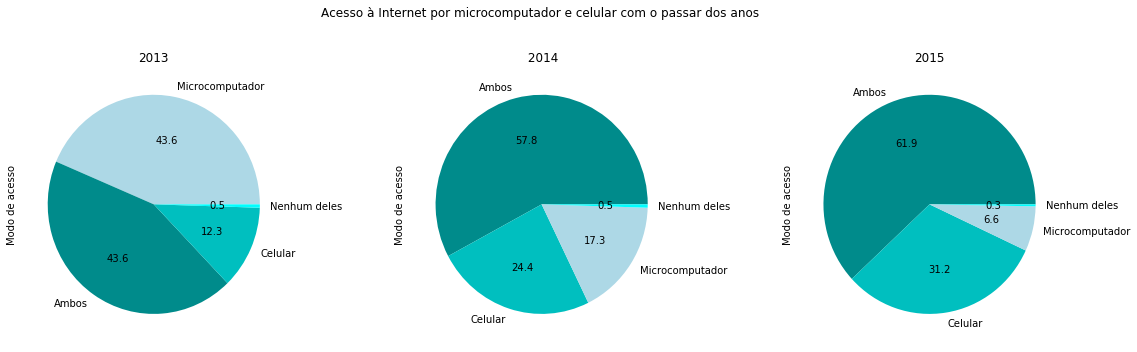

In [8]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
inter13 = dados['Modo de acesso'][dados.Ano==2013].value_counts(True)*100
plot = inter13.plot(kind='pie',autopct="%0.1f",legend=False, title = '2013', colors = ('lightblue','darkcyan','c','cyan'))


plt.subplot(132)
plt.title( 'Acesso à Internet por microcomputador e celular com o passar dos anos \n\n\n 2014')
inter14 = dados['Modo de acesso'][dados.Ano==2014].value_counts(True)*100
plot = inter14.plot(kind='pie',autopct="%0.1f",legend=False,colors = ('darkcyan','c','lightblue','cyan'))

plt.subplot(133)
inter15 = dados['Modo de acesso'][dados.Ano==2015].value_counts(True)*100
plot = inter15.plot(kind='pie',autopct="%0.1f",legend=False,title = '2015',colors = ('darkcyan','c','lightblue','cyan'))

plt.tight_layout()
plt.show()

<em><b>Gráficos 8 a 10 : </b> Gráficos mostrando a frequência relativa por modo de acesso à internet respecivamente nos anos 2013, 2014 e 2015</em>

<p style = "text-indent:4em"> A partir da análise dos <em><b>Gráficos 8 a 10</b></em> é possível perceber que, com o passar dos anos, a porcentagem de pessoas que acessam a internet tanto com o celular quanto com o microcomputador aumentou. Alem disso, nota-se que houve uma diminuição no acesso à internet via microcomputador e um aumento via celular.</p>
<p style = "text-indent:4em"> Para saber se esse acesso ocorre homogeneamente, fez-se o <em><b>Gráfico 11</b></em> o qual considera essa distribuição de modo de acesso á internet em relação a renda.</p></p>

In [9]:
#Função para o gráfico stacked
def porc_linha_ou_coluna(tabela):
    a= (tabela/float(tabela[-1])*100).round(decimals=1)
    return a

rendaxacesso = pd.crosstab(dados['Modo de acesso'],dados['Faixa salarial'],margins=True,rownames=['Faixa salarial'], colnames=['Modo de acesso']).apply(porc_linha_ou_coluna, axis=0)
rendaxacesso = rendaxacesso.reindex(columns=['Até 1/2 salário mínimo','1/2 até 1 salário mínimo', '1 a 2 salários mínimos','2 a 3 salários mínimos','3 a 4 salários mínimos', '4 a 5 salários mínimos', 'Mais de 5 salários mínimos'])

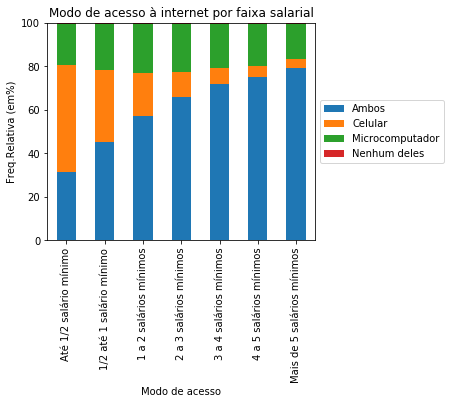

In [10]:
rendaxacesso = rendaxacesso.iloc[0:4,0:7]
plot = rendaxacesso.T.plot(kind='bar', stacked=True,title='Modo de acesso à internet por faixa salarial')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<em><b>Gráfico 11: </b> Gráfico mostrando a relação entre modo de acesso à internet e faixa salarial</em>

<p style = "text-indent:4em"> Os gráficos acima, porém, consideram as pessoas que residem em área urbana no Brasil de qualquer renda e, como fica explícito no <em><b>Gráficos 11</b></em> o àcesso a internet não é feito de maneira igual em todas as faixas de renda, portanto não se pode admitir que o resultado obtido(o qual considera todas as rendas) é igual ao que se busca(domicílios com renda per capita de até 3 salários mínimos).</p>
<p style = "text-indent:4em"> Portanto, deve-se diminuir o DataFrame de modo que fiquem apenas os dados que realmente responderão à pergunta </p>

In [11]:
dados = dados[(dados['Faixa salarial'] == 'Até 1/2 salário mínimo') | (dados['Faixa salarial']=='1/2 até 1 salário mínimo')| (dados['Faixa salarial']=='1 a 2 salários mínimos')| (dados['Faixa salarial']=='2 a 3 salários mínimos')]


<p style = "text-indent:4em"> Com esses dados, é possível fazer os <em><b>Gráficos 12 a 17</b></em> que mostram como foi a evolução do acesso à internet via celular (<em><b>12,13 e 14</b></em>) e via internet(<em><b>15, 16 e 17</b></em> )</p>

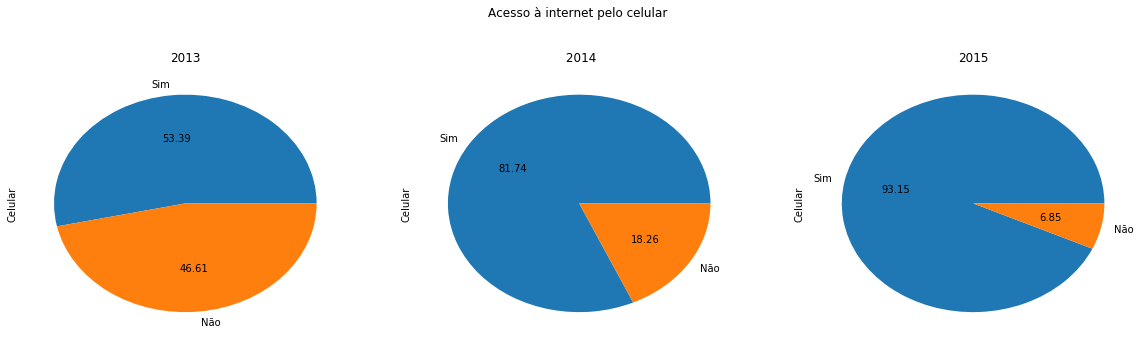

In [12]:
dc15 = dados.Celular[dados.Ano==2015].value_counts(True)*100
dc14 = dados.Celular[dados.Ano==2014].value_counts(True)*100
dc13 = dados.Celular[dados.Ano==2013].value_counts(True)*100

fig= plt.figure(figsize = (20,5))
plt.subplot(131)
plot = dc13.plot(kind='pie',autopct="%0.2f",legend=False, title = '2013')

plt.subplot(132)
plot = dc14.plot(kind='pie',autopct="%0.2f",legend=False, title = 'Acesso à internet pelo celular \n \n \n 2014')

plt.subplot(133)
plot = dc15.plot(kind='pie',autopct="%0.2f",legend=False, title = '2015')

plt.show()


<em><b>Gráficos 12 a 14:</b> Acesso à internet pelo celular por ano</em>

<p style = "text-indent:4em">A partir dos <em><b>Gráficos 12 a 14</b></em> percebe-se que, com o tempo, houve o aumento no acesso à internet pelo celular</p>

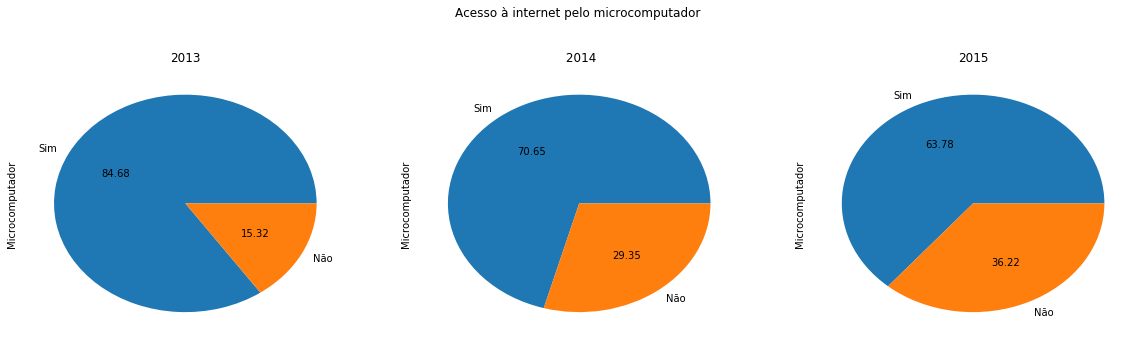

In [13]:
dc15 = dados.Microcomputador[dados.Ano==2015].value_counts(True)*100
dc14 = dados.Microcomputador[dados.Ano==2014].value_counts(True)*100
dc13 = dados.Microcomputador[dados.Ano==2013].value_counts(True)*100

fig= plt.figure(figsize = (20,5))
plt.subplot(131)
plot = dc13.plot(kind='pie',autopct="%0.2f",legend=False, title = '2013')

plt.subplot(132)
plot = dc14.plot(kind='pie',autopct="%0.2f",legend=False, title = 'Acesso à internet pelo microcomputador \n \n \n 2014')

plt.subplot(133)
plot = dc15.plot(kind='pie',autopct="%0.2f",legend=False, title = '2015')

plt.show()

<em><b>Gráficos 15 a 17:</b> Acesso à internet pelo microcomputador por ano</em>

<p style = "text-indent:4em">A partir dos <em><b>Gráficos 15 a 17</b></em> percebe-se que, com o tempo, houve a diminuição no acesso à internet pelo microcomputador</p>

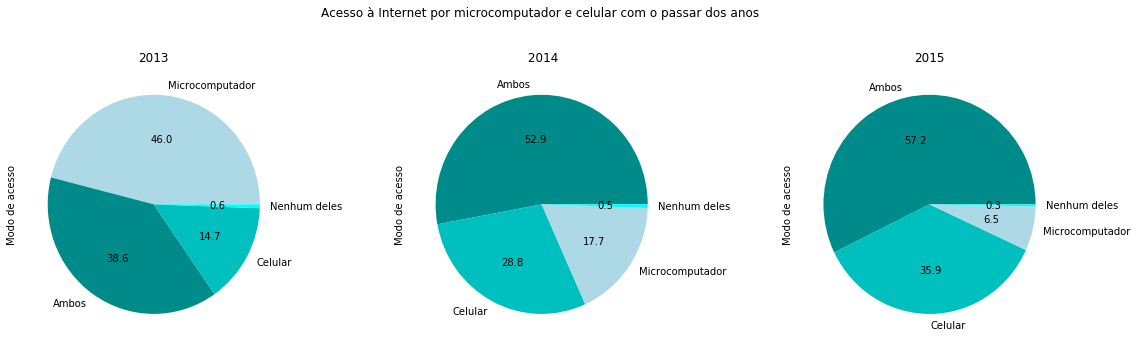

In [14]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
inter13 = dados['Modo de acesso'][dados.Ano==2013].value_counts(True)*100
plot = inter13.plot(kind='pie',autopct="%0.1f",legend=False, title = '2013', colors = ('lightblue','darkcyan','c','cyan'))


plt.subplot(132)
plt.title( 'Acesso à Internet por microcomputador e celular com o passar dos anos \n\n\n 2014')
inter14 = dados['Modo de acesso'][dados.Ano==2014].value_counts(True)*100
plot = inter14.plot(kind='pie',autopct="%0.1f",legend=False,colors = ('darkcyan','c','lightblue','cyan'))

plt.subplot(133)
inter15 = dados['Modo de acesso'][dados.Ano==2015].value_counts(True)*100
plot = inter15.plot(kind='pie',autopct="%0.1f",legend=False,title = '2015',colors = ('darkcyan','c','lightblue','cyan'))

plt.tight_layout()
plt.show()

<em><b>Gráficos 18 a 20:</b> Acesso à internet pelo microcomputador e celular por ano</em>

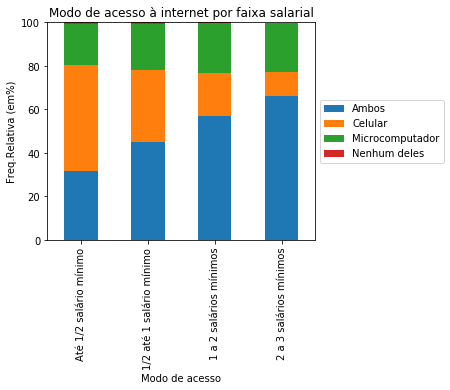

In [15]:

rendaxacesso = pd.crosstab(dados['Modo de acesso'],dados['Faixa salarial'],margins=True,rownames=['Faixa salarial'], colnames=['Modo de acesso']).apply(porc_linha_ou_coluna, axis=0)
rendaxacesso = rendaxacesso.reindex(columns=['Até 1/2 salário mínimo','1/2 até 1 salário mínimo', '1 a 2 salários mínimos','2 a 3 salários mínimos'])
rendaxacesso = rendaxacesso.iloc[0:4,0:4]
plot = rendaxacesso.T.plot(kind='bar', stacked=True,title='Modo de acesso à internet por faixa salarial')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<em><b>Gráfico 21:</b> Modo de acesso à internet por faixa salarial</em>

<p style = "text-indent:4em">A partir do <em><b>Gráfico 21</b></em> percebe-se que, quanto menor a faixa salarial, maior é o acesso via celular. Esse fato, provavelmente deve-se ao custo de planos de internet móvel ser mais baratos, além dos próprios aparelhos eletrônicos também terem um menor preço</p>

<p style = "text-indent:4em">Para ser possível afirmar e ter uma análise mais profunda em relação a essa situação, decidiu-se separar os dados por regiões:</p>

In [16]:
dados_N = dados[dados.REGIAO=='Norte']
dados_NE = dados[dados.REGIAO=='Nordeste']
dados_S = dados[dados.REGIAO=='Sul']
dados_SE = dados[dados.REGIAO=='Sudeste']
dados_CO = dados[dados.REGIAO=='Centro-Oeste']

<h3>1) Norte:</h3>


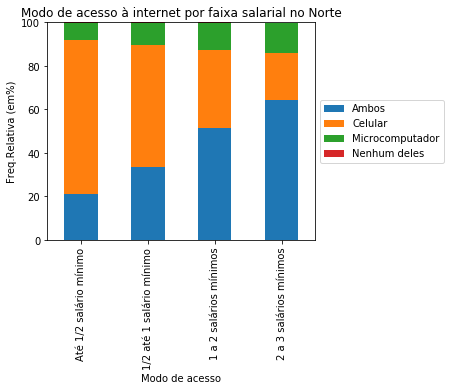

In [17]:
rendaxacessoN = pd.crosstab(dados_N['Modo de acesso'],dados_N['Faixa salarial'],margins=True,rownames=['Faixa salarial'], colnames=['Modo de acesso']).apply(porc_linha_ou_coluna, axis=0)
rendaxacessoN = rendaxacessoN.reindex(columns=['Até 1/2 salário mínimo','1/2 até 1 salário mínimo', '1 a 2 salários mínimos','2 a 3 salários mínimos'])
rendaxacessoN = rendaxacessoN.iloc[0:4,0:4]
plot = rendaxacessoN.T.plot(kind='bar', stacked=True,title='Modo de acesso à internet por faixa salarial no Norte')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<em><b>Gráfico 22:</b> Modo de acesso à internet por faixa salarial no Norte</em>

<h3>2) Nordeste</h3>

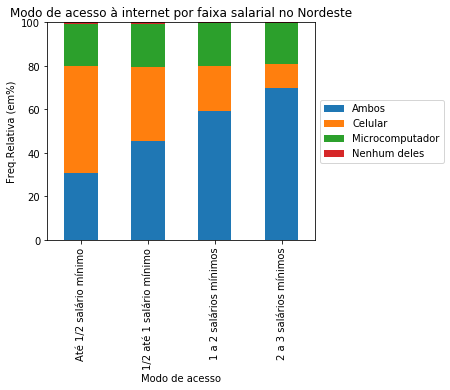

In [18]:
rendaxacessoNE = pd.crosstab(dados_NE['Modo de acesso'],dados_NE['Faixa salarial'],margins=True,rownames=['Faixa salarial'], colnames=['Modo de acesso']).apply(porc_linha_ou_coluna, axis=0)
rendaxacessoNE = rendaxacessoNE.reindex(columns=['Até 1/2 salário mínimo','1/2 até 1 salário mínimo', '1 a 2 salários mínimos','2 a 3 salários mínimos'])
rendaxacessoNE = rendaxacessoNE.iloc[0:4,0:]
plot = rendaxacessoNE.T.plot(kind='bar', stacked=True,title='Modo de acesso à internet por faixa salarial no Nordeste')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<em><b>Gráfico 23:</b> Modo de acesso à internet por faixa salarial no Nordeste</em>

<h3>3)Centro-Oeste</h3>

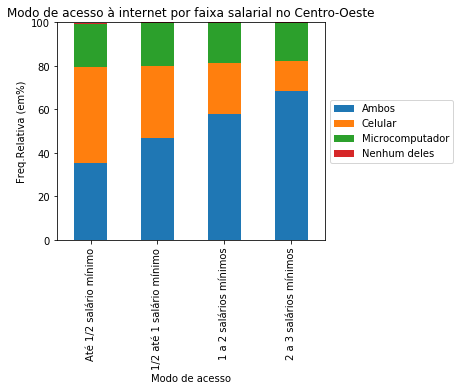

In [19]:
rendaxacessoCO = pd.crosstab(dados_CO['Modo de acesso'],dados_CO['Faixa salarial'],margins=True,rownames=['Faixa salarial'], colnames=['Modo de acesso']).apply(porc_linha_ou_coluna, axis=0)
rendaxacessoCO = rendaxacessoCO.reindex(columns=['Até 1/2 salário mínimo','1/2 até 1 salário mínimo', '1 a 2 salários mínimos','2 a 3 salários mínimos'])
rendaxacessoCO = rendaxacessoCO.iloc[0:4,0:]
plot = rendaxacessoCO.T.plot(kind='bar', stacked=True,title='Modo de acesso à internet por faixa salarial no Centro-Oeste')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<em><b>Gráfico 24:</b> Modo de acesso à internet por faixa salarial no Centro-Oeste</em>

<h3>4) Suldeste</h3>

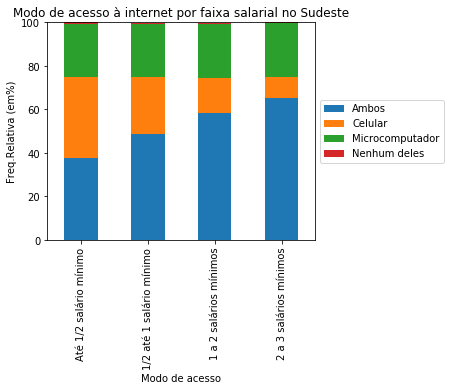

In [20]:
rendaxacessoSE = pd.crosstab(dados_SE['Modo de acesso'],dados_SE['Faixa salarial'],margins=True,rownames=['Faixa salarial'], colnames=['Modo de acesso']).apply(porc_linha_ou_coluna, axis=0)
rendaxacessoSE = rendaxacessoSE.reindex(columns=['Até 1/2 salário mínimo','1/2 até 1 salário mínimo', '1 a 2 salários mínimos','2 a 3 salários mínimos'])
rendaxacessoSE = rendaxacessoSE.iloc[0:4,0:]
plot = rendaxacessoSE.T.plot(kind='bar', stacked=True,title='Modo de acesso à internet por faixa salarial no Sudeste')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<em><b>Gráfico 25:</b> Modo de acesso à internet por faixa salarial no Sudeste</em>

<h3>5) Sul</h3>

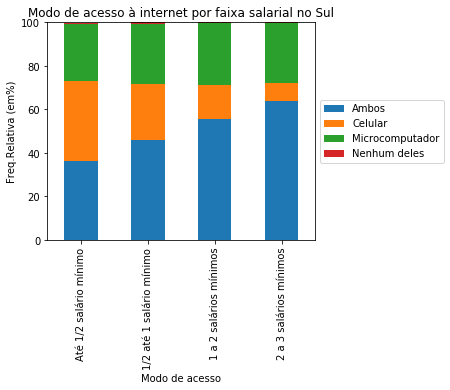

In [21]:
rendaxacessoS = pd.crosstab(dados_S['Modo de acesso'],dados_S['Faixa salarial'],margins=True,rownames=['Faixa salarial'], colnames=['Modo de acesso']).apply(porc_linha_ou_coluna, axis=0)
rendaxacessoS = rendaxacessoS.reindex(columns=['Até 1/2 salário mínimo','1/2 até 1 salário mínimo', '1 a 2 salários mínimos','2 a 3 salários mínimos'])
rendaxacessoS = rendaxacessoS.iloc[0:4,0:]
plot = rendaxacessoS.T.plot(kind='bar', stacked=True,title='Modo de acesso à internet por faixa salarial no Sul')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<em><b>Gráfico 26:</b> Modo de acesso à internet por faixa salarial no Sul</em>

<p style = "text-indent:4em">Analisando e comparando os <em><b>Gráficos 22 a 26</b></em> percebe-se que, das pessoas com renda de até 1/2 salário mínimo e que acessam a internet apenas pelo celular aparecem em maior frequência na região Norte e em menor frequência nas regiões Sul e Sudeste(as quais apresentam frequências bem parecidas). Já em relação às pessoas com maior renda entre as analisadas(2 a 3 slários mínimos), onde há a menor frequência de pessoas que acessam a internet apenas pelo celular é na região Sul e a maior é no Norte.</p>

<p style = "text-indent:4em">Buscando encontrar uma maneira mais fácil de visualizar a proporção de acesso á internet por região, fez-se os seguintes gráficos, formando uma tabela:</p>

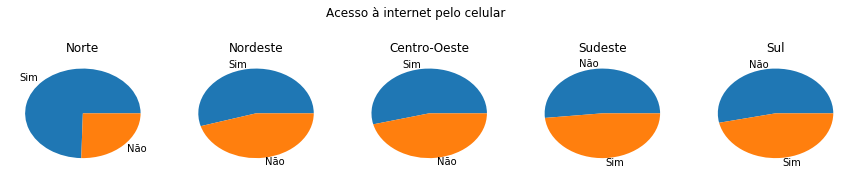

2013


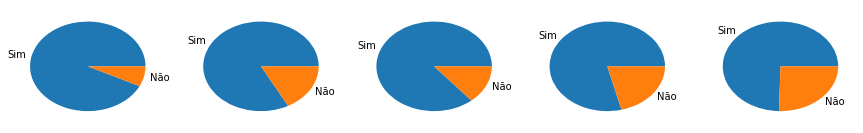

2014


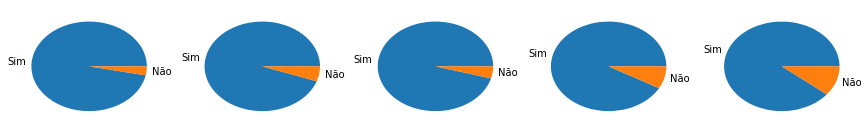

2015


In [22]:
#Celular por região
dados15 = dados[dados.Ano == 2015]
dados14 = dados[dados.Ano == 2014]
dados13 = dados[dados.Ano == 2013]
dcn15 = dados15.Celular[dados15.REGIAO =='Norte'].value_counts(True)*100
dcnd15 = dados15.Celular[dados15.REGIAO =='Nordeste'].value_counts(True)*100
dcsd15 = dados15.Celular[dados15.REGIAO =='Sudeste'].value_counts(True)*100
dcs15 = dados15.Celular[dados15.REGIAO =='Sul'].value_counts(True)*100
dcc15 = dados15.Celular[dados15.REGIAO =='Centro-Oeste'].value_counts(True)*100


dcn14 = dados14.Celular[dados14.REGIAO =='Norte'].value_counts(True)*100
dcnd14 = dados14.Celular[dados14.REGIAO =='Nordeste'].value_counts(True)*100
dcsd14 = dados14.Celular[dados14.REGIAO =='Sudeste'].value_counts(True)*100
dcs14 = dados14.Celular[dados14.REGIAO =='Sul'].value_counts(True)*100
dcc14 = dados14.Celular[dados14.REGIAO =='Centro-Oeste'].value_counts(True)*100


dcn13 = dados13.Celular[dados13.REGIAO =='Norte'].value_counts(True)*100
dcnd13 = dados13.Celular[dados13.REGIAO =='Nordeste'].value_counts(True)*100
dcsd13 = dados13.Celular[dados13.REGIAO =='Sudeste'].value_counts(True)*100
dcs13 = dados13.Celular[dados13.REGIAO =='Sul'].value_counts(True)*100
dcc13 = dados13.Celular[dados13.REGIAO =='Centro-Oeste'].value_counts(True)*100


#------------------------ 2013 --------------------
fig= plt.figure(figsize = (15,7))


plt.subplot(351)
plot = dcn13.plot(kind='pie',legend=False, title = 'Norte')
plt.ylabel(' ')

plt.subplot(352)
plot = dcnd13.plot(kind='pie',legend=False,title = 'Nordeste')
plt.ylabel(' ')
plt.subplot(353)
plot = dcc13.plot(kind='pie',legend=False, title = 'Centro-Oeste')
plt.ylabel(' ')

plt.subplot(354)
plot = dcsd13.plot(kind='pie',legend=False, title = 'Sudeste')
plt.ylabel(' ')

plt.subplot(355)
plot = dcs13.plot(kind='pie',legend=False, title = 'Sul')
plt.ylabel(' ')


plt.suptitle('Acesso à internet pelo celular')
plt.show()

print(2013)
# ------------------------ 2014 ----------------------------
fig= plt.figure(figsize = (15,7))

plt.subplot(351)
plot = dcn14.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(352)
plot = dcnd14.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(353)
plot = dcc14.plot(kind='pie',legend=False)
plt.ylabel(' ')


plt.subplot(354)
plot = dcsd14.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(355)
plot = dcs14.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.show()

#------------2015-------------------
fig= plt.figure(figsize = (15,7))

plt.subplot(351)
plot = dcn15.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(352)
plot = dcnd15.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(353)
plot = dcc15.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(354)
plot = dcsd15.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(355)
plot = dcs15.plot(kind='pie',legend=False)
plt.ylabel(' ')


print(2014)

plt.show()
print(2015)

<em><b>Tabela 1:</b> Acesso à internet pelo celular por região nos anos 2013, 2014 e 2015</em>

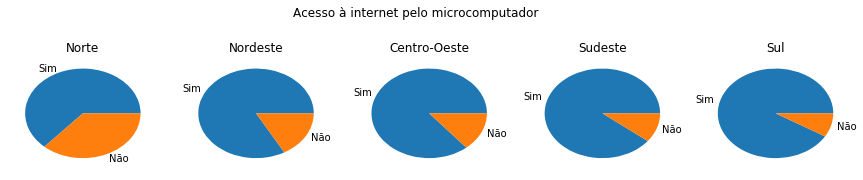

2013


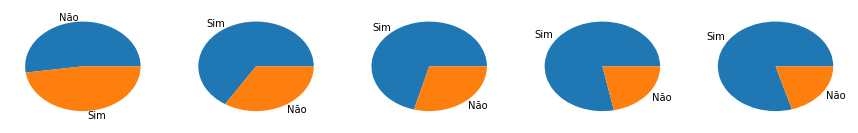

2014


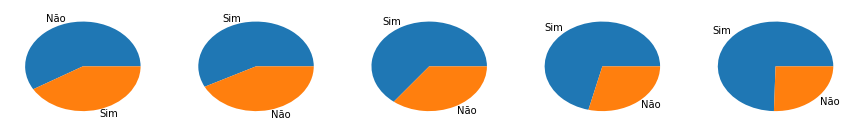

2015


In [23]:
#Celular por região
dados15 = dados[dados.Ano == 2015]
dados14 = dados[dados.Ano == 2014]
dados13 = dados[dados.Ano == 2013]
dcn15 = dados15.Microcomputador[dados15.REGIAO =='Norte'].value_counts(True)*100
dcnd15 = dados15.Microcomputador[dados15.REGIAO =='Nordeste'].value_counts(True)*100
dcsd15 = dados15.Microcomputador[dados15.REGIAO =='Sudeste'].value_counts(True)*100
dcs15 = dados15.Microcomputador[dados15.REGIAO =='Sul'].value_counts(True)*100
dcc15 = dados15.Microcomputador[dados15.REGIAO =='Centro-Oeste'].value_counts(True)*100


dcn14 = dados14.Microcomputador[dados14.REGIAO =='Norte'].value_counts(True)*100
dcnd14 = dados14.Microcomputador[dados14.REGIAO =='Nordeste'].value_counts(True)*100
dcsd14 = dados14.Microcomputador[dados14.REGIAO =='Sudeste'].value_counts(True)*100
dcs14 = dados14.Microcomputador[dados14.REGIAO =='Sul'].value_counts(True)*100
dcc14 = dados14.Microcomputador[dados14.REGIAO =='Centro-Oeste'].value_counts(True)*100


dcn13 = dados13.Microcomputador[dados13.REGIAO =='Norte'].value_counts(True)*100
dcnd13 = dados13.Microcomputador[dados13.REGIAO =='Nordeste'].value_counts(True)*100
dcsd13 = dados13.Microcomputador[dados13.REGIAO =='Sudeste'].value_counts(True)*100
dcs13 = dados13.Microcomputador[dados13.REGIAO =='Sul'].value_counts(True)*100
dcc13 = dados13.Microcomputador[dados13.REGIAO =='Centro-Oeste'].value_counts(True)*100


#------------------------ 2013 --------------------
fig= plt.figure(figsize = (15,7))


plt.subplot(351)
plot = dcn13.plot(kind='pie',legend=False, title = 'Norte')
plt.ylabel(' ')

plt.subplot(352)
plot = dcnd13.plot(kind='pie',legend=False,title = 'Nordeste')
plt.ylabel(' ')
plt.subplot(353)
plot = dcc13.plot(kind='pie',legend=False, title = 'Centro-Oeste')
plt.ylabel(' ')

plt.subplot(354)
plot = dcsd13.plot(kind='pie',legend=False, title = 'Sudeste')
plt.ylabel(' ')

plt.subplot(355)
plot = dcs13.plot(kind='pie',legend=False, title = 'Sul')
plt.ylabel(' ')


plt.suptitle('Acesso à internet pelo microcomputador')
plt.show()

print(2013)
# ------------------------ 2014 ----------------------------
fig= plt.figure(figsize = (15,7))

plt.subplot(351)
plot = dcn14.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(352)
plot = dcnd14.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(353)
plot = dcc14.plot(kind='pie',legend=False)
plt.ylabel(' ')


plt.subplot(354)
plot = dcsd14.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(355)
plot = dcs14.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.show()

#------------2015-------------------
fig= plt.figure(figsize = (15,7))

plt.subplot(351)
plot = dcn15.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(352)
plot = dcnd15.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(353)
plot = dcc15.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(354)
plot = dcsd15.plot(kind='pie',legend=False)
plt.ylabel(' ')

plt.subplot(355)
plot = dcs15.plot(kind='pie',legend=False)
plt.ylabel(' ')


print(2014)

plt.show()
print(2015)

<em><b>Tabela 2:</b> Acesso à internet pelo microcomputador por região nos anos 2013, 2014 e 2015</em>


## Conclusão 

<p style = "text-indent:4em"> Analisando as <em><b>Tabelas 1 e 2</b></em> e os <em><b>Gráficos 22 a 26</b></em> , nota-se que:</p>
<ul>
    <li>Ao contrário do que muitos pensam, pois creem que o microcomputador é uma tecnologia atual, a porcentagem de pessoas que acessam à internet pelo microcomputador está diminuindo</li>
    <li>Em todas as regiões está ocorrendo o mesmo processo: diminiuição do acesso à internet pelo microcomputador e aumento do acesso pelo celular </li>
    <li>O Norte é a região em que se encontra menos acesso à internet pelo microcomputador e maior acesso pelo celular</li>
    <li>O Sul é a região em que se encontra maior acesso à internet pelo microcomputador e menor acesso pelo celular</li>
</ul></p>
<p style = "text-indent:4em"> A partir disso, pode-se relacionar essas informações com as carecterísticas de cada região, percebendo que o Norte é a região mais pobre, e o Sul, está entre as mais ricas. Dessa maneira, é possível  associar o nível de riqueza de uma região e o seu estado aproximado nesse processo: </p>
<ul>
    <li>Quanto mais rica a região, maior o acesso à internet pelo microcoputador por pessoas de até 3 salários mínimos</li>
    <li>Quanto mais rica a região, menor o acesso à internet pelo celular por pessoas de até 3 salários mínimos</li>
</ul>
<p style = "text-indent:4em"> Ou, também é possível associar a frequência de domicílios com acesso à internet pelo celular e pelo computador dessa maneira:
<ul>
    <li>Quanto maior a porcentagem de acesso à internet pelo celular, menor o acesso à internet pelo microcomputador por pessoas de até 3 salários mínimos</li>
    <li>Quanto maior a porcentagem de acesso à internet pelo microcomputador, menor o acesso à internet pelo celular por pessoas de até 3 salários mínimos</li>
</ul>

<p style = "text-indent:4em"> Possíveis motivos para o Norte ter essa frequência tão elevada de acesso à internet pelo celular são, de acordo com pesquisadora do IBGE, o fato de o acesso à internet móvel ser mais barato do que a internet fixa e a infraestrutura, pois "a região Norte tem uma dificuldade maior em passar cabo, o que poderia aumentar essa proporção de acesso à banda larga fixa". Além disso, pode-se perceber também que o valor de um celular normalmente é menor do que o de um microcomputador, facilitando o acesso ao mesmo por populações mais pobres.</p>

<p><b>Fonte:</b></p>
<em>http://agenciabrasil.ebc.com.br/geral/noticia/2016-12/ibge-celular-se-consolida-como-o-principal-meio-de-acesso-internet-no-brasil</em>

<p style = "text-indent:4em">Conclui-se, por fim, que, entre os domicílios com renda de até 3 salários mínimos, enquanto o número de pessoas que acessam à internet pelo celular está aumentando, o número das que aessam pelo microcomputador está diminiundo, em proporções diferentes por região, porém em todas ocorre o mesmo fenômeno.</p>